In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("survey_results_public.csv")

In [22]:
data.head()

,Country,Education,Total Coding Experience,Professional Coding Experience,Salary
9,Sweden,Master’s degree,7.0,4.0,51552.0
11,Spain,Bachelor’s degree,12.0,5.0,46482.0
12,Germany,Master’s degree,15.0,6.0,77290.0
17,Canada,Bachelor’s degree,9.0,6.0,46135.0
23,France,Master’s degree,9.0,2.0,38915.0


In [23]:
data = data[["Country", "EdLevel", "YearsCode", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
data = data.rename({"ConvertedCompYearly": "Salary"}, axis=1)
data = data.rename({"EdLevel": "Education"}, axis=1)
data = data.rename({"YearsCode": "Total Coding Experience"}, axis=1)
data = data.rename({"YearsCodePro": "Professional Coding Experience"}, axis=1)
data.head()

KeyError: "['EdLevel', 'YearsCode', 'YearsCodePro', 'Employment', 'ConvertedCompYearly'] not in index"

In [24]:
data = data[data["Salary"].notnull()]
data.head()

,Country,Education,Total Coding Experience,Professional Coding Experience,Salary
9,Sweden,Master’s degree,7.0,4.0,51552.0
11,Spain,Bachelor’s degree,12.0,5.0,46482.0
12,Germany,Master’s degree,15.0,6.0,77290.0
17,Canada,Bachelor’s degree,9.0,6.0,46135.0
23,France,Master’s degree,9.0,2.0,38915.0


In [25]:
data = data.dropna()
data.isnull().sum()

Country                           0
Education                         0
Total Coding Experience           0
Professional Coding Experience    0
Salary                            0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29850 entries, 9 to 83436
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         29850 non-null  object 
 1   Education                       29850 non-null  object 
 2   Total Coding Experience         29850 non-null  float64
 3   Professional Coding Experience  29850 non-null  float64
 4   Salary                          29850 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.4+ MB


In [27]:
data = data[data["Employment"] == "Employed full-time"]
data = data.drop("Employment", axis=1)
data.info()

KeyError: 'Employment'

In [28]:
data["Country"].value_counts()

United States of America                                8451
Other                                                   6367
Germany                                                 2551
United Kingdom of Great Britain and Northern Ireland    2342
Canada                                                  1468
France                                                  1232
India                                                    957
Netherlands                                              803
Australia                                                776
Sweden                                                   719
Spain                                                    667
Brazil                                                   583
Poland                                                   561
Italy                                                    515
Russian Federation                                       461
Israel                                                   412
Switzerland             

In [29]:
def remove_countries(countries, cutoff):
    remaining_countries = {}
    for i in range(len(countries)):
        if countries.values[i] >= cutoff:
            remaining_countries[countries.index[i]] = countries.index[i]
        else:
            remaining_countries[countries.index[i]] = "Other"
    return remaining_countries

In [30]:
remaining_countries = remove_countries(data.Country.value_counts(), 400)
data["Country"] = data["Country"].map(remaining_countries)
data.Country.value_counts()

United States of America                                8451
Other                                                   7352
Germany                                                 2551
United Kingdom of Great Britain and Northern Ireland    2342
Canada                                                  1468
France                                                  1232
India                                                    957
Netherlands                                              803
Australia                                                776
Sweden                                                   719
Spain                                                    667
Brazil                                                   583
Poland                                                   561
Italy                                                    515
Russian Federation                                       461
Israel                                                   412
Name: Country, dtype: in

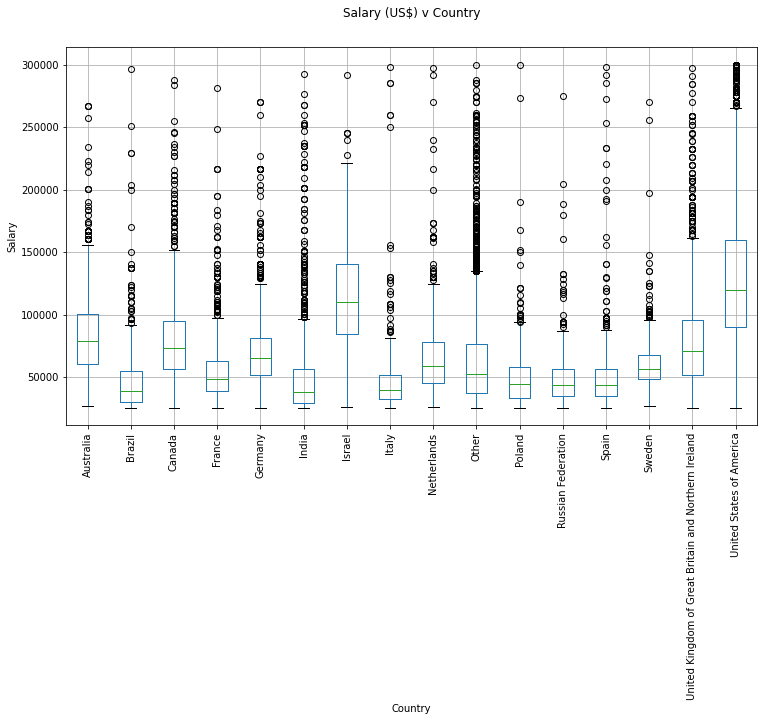

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [32]:
data = data[data["Salary"] <= 300000]
data = data[data["Salary"] >= 25000]

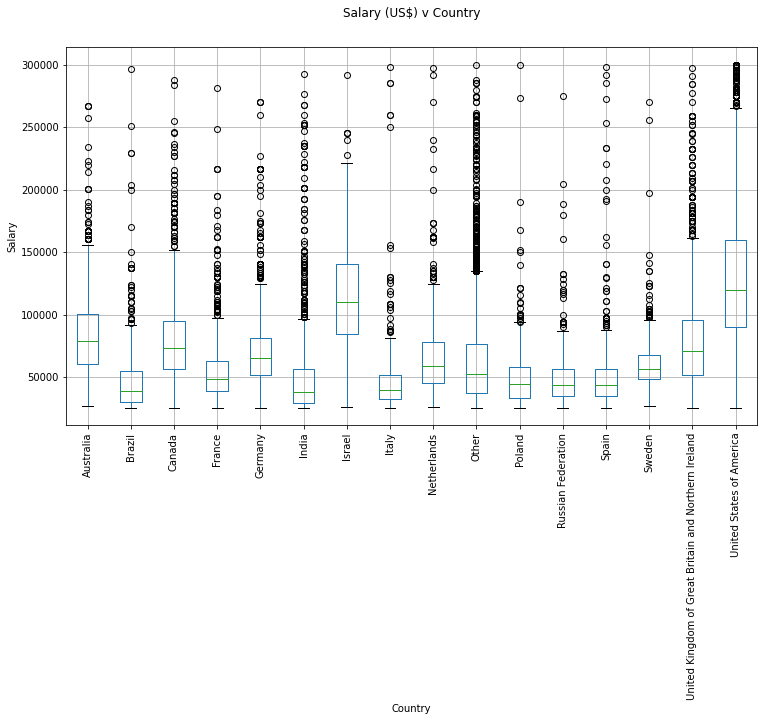

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [35]:
data["Professional Coding Experience"].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. ,  7. ,
       22. , 13. ,  9. , 20. , 39. , 27. , 23. , 35. , 30. , 19. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 42. , 28. , 32. , 36. , 47. ,
       45. , 44. , 41. , 50. , 49. , 48. , 46. ])

In [36]:
def clean_experience(years):
    if years ==  "More than 50 years":
        return 50
    if years == "Less than 1 year":
        return 0.5
    return float(years)

data["Professional Coding Experience"] = data["Professional Coding Experience"].apply(clean_experience)

In [37]:
data["Education"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'No college degree',
       'Doctoral degree', 'Associate degree', 'Professional degree'],
      dtype=object)

In [38]:
def clean_education(education):
    if "Bachelor’s degree" in education:
        return 'Bachelor’s degree'
    if "Master’s degree" in education:
        return 'Master’s degree'
    if "Other doctoral" in education:
        return "Doctoral degree"
    if "Professional degree" in education:
        return "Professional degree"
    if "Associate degree" in education:
        return "Associate degree"
    return "No college degree"

data["Education"] = data["Education"].apply(clean_education)
data["Education"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'No college degree',
       'Associate degree', 'Professional degree'], dtype=object)

In [39]:
data["Total Coding Experience"].unique()

array([ 7. , 12. , 15. ,  9. , 26. , 14. , 39. , 20. ,  4. , 19. ,  8. ,
        6. , 22. , 34. , 21. , 13. , 25. , 24. , 10. , 31. , 18. , 38. ,
        5. , 17. ,  1. , 27. , 41. , 42. ,  3. , 16. , 35. , 23. , 28. ,
       30. ,  2. , 44. , 40. , 11. , 36. , 45. , 33. , 43. , 29. , 32. ,
       47. , 50. , 37. , 49. , 48. , 46. ,  0.5])

In [40]:
data["Total Coding Experience"] = data["Total Coding Experience"].apply(clean_experience)

In [41]:
data["Total Coding Experience"].unique()

array([ 7. , 12. , 15. ,  9. , 26. , 14. , 39. , 20. ,  4. , 19. ,  8. ,
        6. , 22. , 34. , 21. , 13. , 25. , 24. , 10. , 31. , 18. , 38. ,
        5. , 17. ,  1. , 27. , 41. , 42. ,  3. , 16. , 35. , 23. , 28. ,
       30. ,  2. , 44. , 40. , 11. , 36. , 45. , 33. , 43. , 29. , 32. ,
       47. , 50. , 37. , 49. , 48. , 46. ,  0.5])

In [42]:
from sklearn.preprocessing import LabelEncoder
encode_education = LabelEncoder()
data["Education"] = encode_education.fit_transform(data["Education"])
data["Education"].unique()

ModuleNotFoundError: No module named 'sklearn'

In [43]:
encode_country = LabelEncoder()
data["Country"] = encode_country.fit_transform(data["Country"])
data["Country"].unique()

NameError: name 'LabelEncoder' is not defined

In [44]:
parameters = data.drop("Salary", axis=1)
salary = data["Salary"]

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(parameters, salary.values)

In [ ]:
predicted_value = linear_regression.predict(parameters)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(salary, predicted_value))

In [ ]:
error

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(parameters, salary.values)

In [ ]:
predicted_value = decision_tree.predict(parameters)
error = np.sqrt(mean_squared_error(salary, predicted_value))

In [ ]:
error

In [ ]:
print("${:,.02f}".format(error))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(parameters, salary.values)

In [ ]:
predicted_value = random_forest.predict(parameters)
error = np.sqrt(mean_squared_error(salary, predicted_value))

In [ ]:
error

In [ ]:
print("${:,.02f}".format(error))

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12,14,16,18]
param = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
grid = GridSearchCV(regressor, param, scoring='neg_mean_squared_error')
grid.fit(parameters, predicted_value)

In [ ]:
regressor = grid.best_estimator_

regressor.fit(parameters, predicted_value)
predicted_value = regressor.predict(parameters)
error = np.sqrt(mean_squared_error(salary, predicted_value))
print("${:,.02f}".format(error))

In [ ]:
parameters

In [ ]:
parameters = np.array([["United States of America", "Doctoral degree", 15, 7]])
parameters

In [ ]:
parameters[:, 0] = encode_country.transform(parameters[:,0])
parameters[:, 1] = encode_education.transform(parameters[:,1])
parameters = parameters.astype(float)
parameters

In [ ]:
predicted_value = regressor.predict(parameters)
predicted_value

In [ ]:
import pickle
input_data = {"model": regressor, "encode_country": encode_country, "encode_education": encode_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(input_data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    input_data = pickle.load(file)

load_regressor = input_data["model"]
encode_country = input_data["encode_country"]
encode_education = input_data["encode_education"]

In [ ]:
predicted_value = load_regressor.predict(parameters)
predicted_value